<a href="https://colab.research.google.com/github/Staneering/materials/blob/master/COGedited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
'''
The dataset used was imported from kaggle, this code was used to import the dataset into the notebook.


'''

'\nThe dataset used was imported from kaggle, this code was used to import the dataset into the notebook.\n\n\n'

In [18]:
'''# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'latest-covid-19-dataset-worldwide:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1852043%2F3023973%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T125445Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D557f7a235941f94e7cd7aebb367f208c8a109d9acbb10ed771828d70448de27899da426c01da580342adcc32d01f90f379be95aa33b2f6fab41acb1ab0f7a255e81b47da9336a46bdacfb3d9fe1fa3bca49a1fb3d3b2328c09e5365a41080080b7d20b7592e2177e1d0b7320af99501c044ebc93a900a62372743497e112555ed667f42d423277e39182e6f3c2e40ce065425d1663b59044fef63a0f1cfe12263d0ff2c1c7fb8ba5d808e678b922d9488fa11c3e3d1e027145c8aac6cfcbd3f0537002f1cca6112b284adcd922e7a02c4963048962a172ddda3a1ead7430d7d740f649dfe38bfdbaf9cfb2ab89f35869fdcb9a1ae0391d943af23883ca2179b8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')'''


'# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES\n# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,\n# THEN FEEL FREE TO DELETE THIS CELL.\n# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE\'S PYTHON\n# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR\n# NOTEBOOK.\n\nimport os\nimport sys\nfrom tempfile import NamedTemporaryFile\nfrom urllib.request import urlopen\nfrom urllib.parse import unquote, urlparse\nfrom urllib.error import HTTPError\nfrom zipfile import ZipFile\nimport tarfile\nimport shutil\n\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'latest-covid-19-dataset-worldwide:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1852043%2F3023973%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T125445Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog

In [19]:
import numpy as np  # Lineal algebra
import pandas as pd # Data wrangling
import zipfile # Unzip files
from statsmodels.tsa.arima.model import ARIMA #ARIMA model (arima_model is deprecated, use this one instead!)
from statsmodels.tsa.stattools import adfuller #Dickey-Fuller test for stationarity

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [20]:
with zipfile.ZipFile('/owid-covid-data (2).csv.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  # Extract to a directory

In [21]:
df = pd.read_csv('extracted_files/owid-covid-data (2).csv')

In [22]:
#df = pd.read_csv('../input/latest-covid-19-dataset-worldwide/owid-covid-data (2).csv')

In [23]:
'''
DATA FORMATTING

the date column in the dataset to standard pandas datatime type
COG is selected as this analysis is for Congo.
the vaccination column is used to create a new dataframe.
we resample the dataframe to weekly frequency to filter out noise.


This result is now plotted to visualize the data.

'''

'\nDATA FORMATTING \n\nthe date column in the dataset to standard pandas datatime type\nCOG is selected as this analysis is for Congo.\nthe vaccination column is used to create a new dataframe.\nwe resample the dataframe to weekly frequency to filter out noise.\n\n\nThis result is now plotted to visualize the data.\n\n'

In [24]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['iso_code']=='COG']
df = df.set_index('date')
hospitalized = df[['new_vaccinations_smoothed']]
hospitalized = hospitalized.resample('W-MON').mean()

<Axes: xlabel='date'>

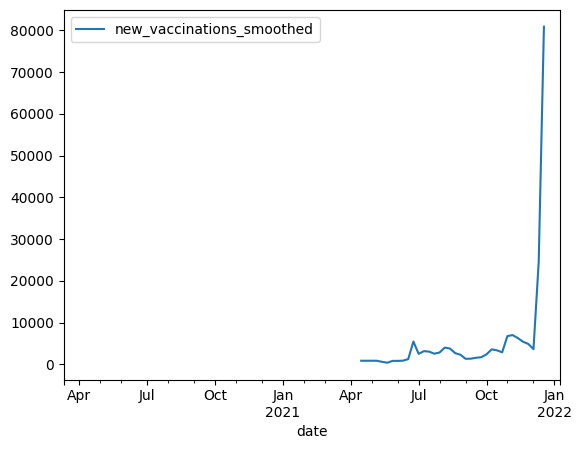

In [25]:
hospitalized.plot()

In [26]:
'''
From the plot, there are obviousoly null values, we drop the null values.
We see the subsequent plot is void of nulls.

'''

'\nFrom the plot, there are obviousoly null values, we drop the null values.\nWe see the subsequent plot is void of nulls.\n\n'

In [27]:
hospitalized = hospitalized.dropna()

<Axes: xlabel='date'>

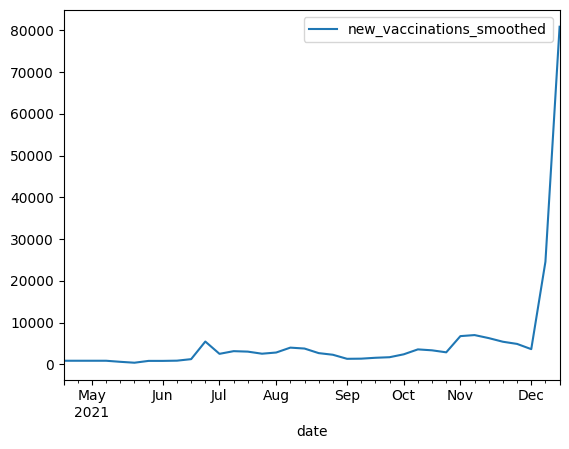

In [28]:
hospitalized.plot()

<Axes: xlabel='date'>

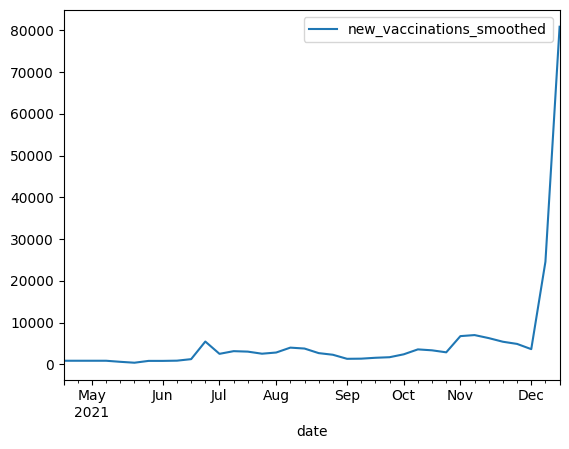

In [29]:

hospitalized.plot()

In [30]:
'''
Adfuller test is performed to check for stationarity.
A high p-value suggests non-stationarity, hence the need for differencing.

After differencing is performed, the p-value<0.05 meaning we have a stationary series

We then proceed to make a plot of the autocorrelation and partial autocorrelation functions.


'''

'\nAdfuller test is performed to check for stationarity.\nA high p-value suggests non-stationarity, hence the need for differencing.\n\nAfter differencing is performed, the p-value<0.05 meaning we have a stationary series\n\nWe then proceed to make a plot of the autocorrelation and partial autocorrelation functions.\n\n\n'

In [31]:
result = adfuller(hospitalized)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.433368
p-value: 1.000000


In [32]:
diffhosp = hospitalized.diff().dropna() # Save the first difference
result = adfuller(diffhosp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 5.085695
p-value: 1.000000


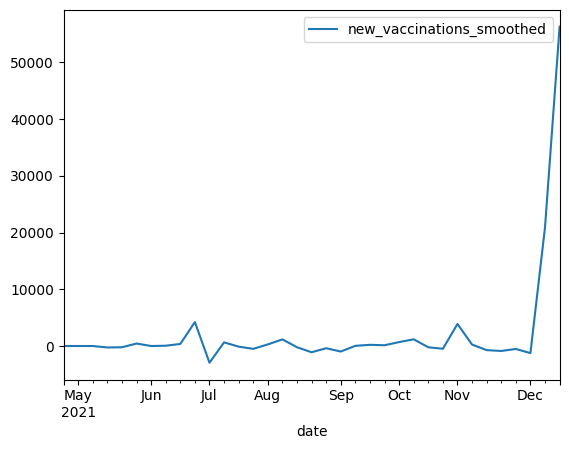

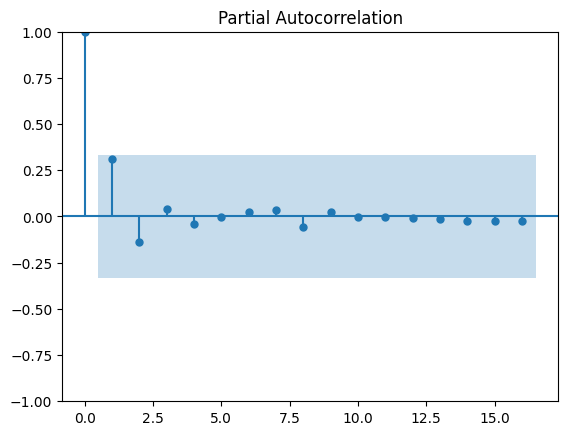

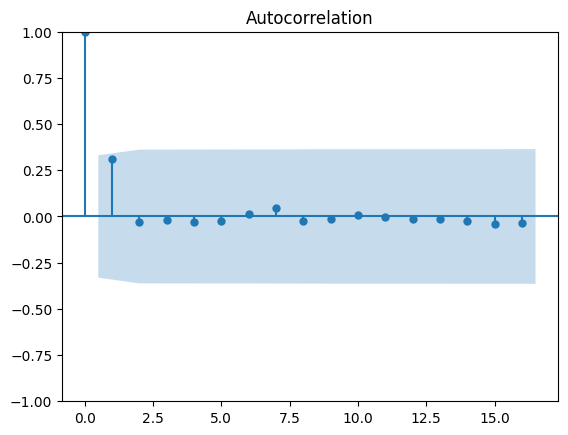

In [33]:
diffhosp.plot()
pacf =  plot_pacf(diffhosp)
acf =  plot_acf(diffhosp)

In [34]:
'''
the insights we get from the PACF help us to train our model.
The ARIMA.fit trains the model, 2,1 and 2 specify the order of Auto Regressive, Integrated and Moving Averages
used in training the model.

Model.summary shows the results of the training.
'''

'\nthe insights we get from the PACF help us to train our model.\nThe ARIMA.fit trains the model, 2,1 and 2 specify the order of Auto Regressive, Integrated and Moving Averages \nused in training the model.\n\nModel.summary shows the results of the training.\n'

In [35]:
model = ARIMA(hospitalized,order= (2,1,2)).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                   36
Model:                        ARIMA(2, 1, 2)   Log Likelihood                -352.625
Date:                       Mon, 17 Jun 2024   AIC                            715.250
Time:                               14:14:58   BIC                            723.027
Sample:                           04-19-2021   HQIC                           717.935
                                - 12-20-2021                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8089      1.097      1.648      0.099      -0.342       3.960
ar.L2         -0.8089      0.730     -1.108      0.268      -2.240       0.622
ma.L1          0.1538      1.065      0.144      0.885      -1.934       2.242
ma.L2          0.0886      1.177      0.075      0.940      -2.219       2.396
sigma2      3.443e+07   4.49e-07   7.67e+13      0.000    3.44e+07    3.44e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                74.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                             1.87
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.91e+29. Standard errors may be unstable.
"""

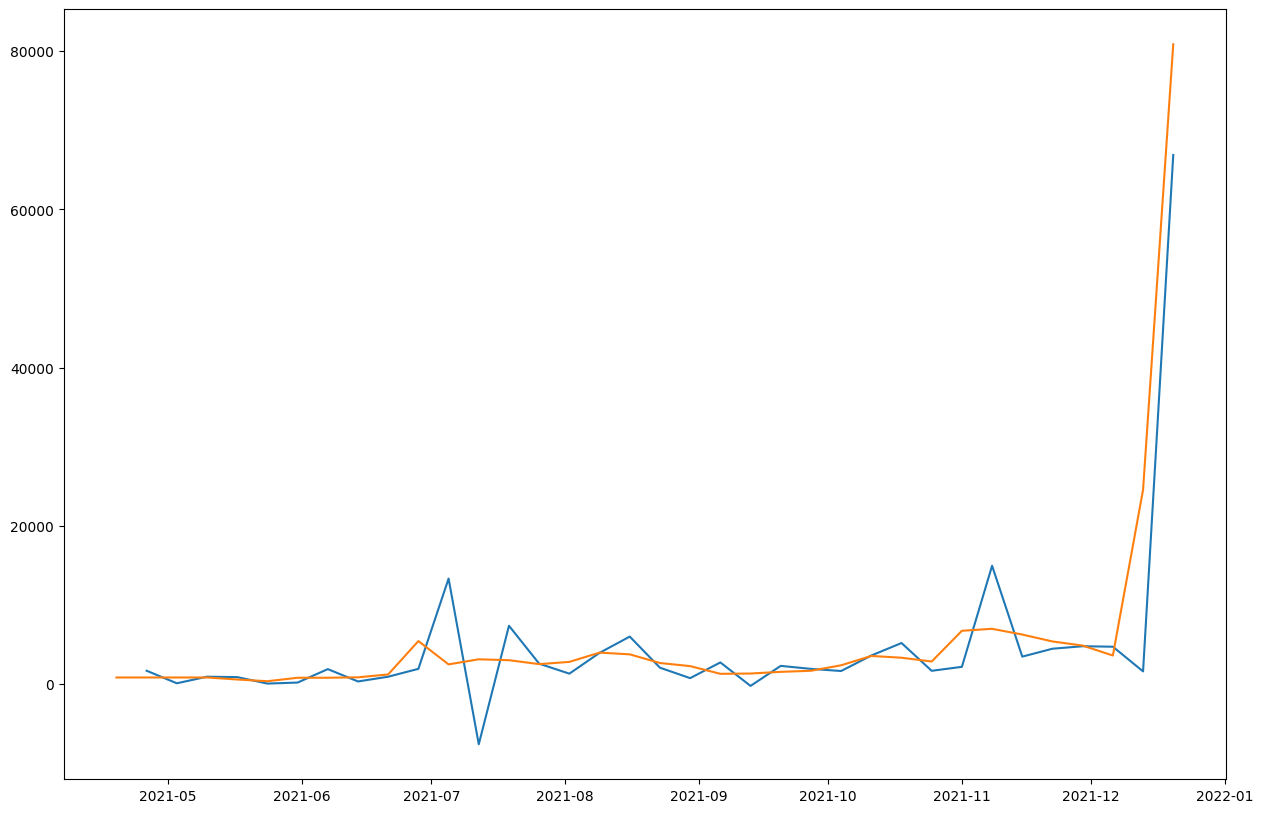

In [36]:
predictions = model.predict()
plt.figure(figsize=(15,10))
plt.plot(predictions[1:])
plt.plot(hospitalized)

In [37]:
train = hospitalized[:-5]
test = hospitalized[-5:]
model = ARIMA(train,order= (2,1,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                   31
Model:                        ARIMA(2, 1, 2)   Log Likelihood                -254.921
Date:                       Mon, 17 Jun 2024   AIC                            519.842
Time:                               14:14:59   BIC                            526.848
Sample:                           04-19-2021   HQIC                           522.083
                                - 11-15-2021                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2201      0.305     -0.721      0.471      -0.818       0.378
ar.L2         -0.8538      0.367     -2.328      0.020      -1.573      -0.135
ma.L1         -0.0259      0.360     -0.072      0.943      -0.731       0.679
ma.L2          0.9821      2.103      0.467      0.640      -3.139       5.103
sigma2      1.276e+06   2.45e+06      0.521      0.602   -3.52e+06    6.07e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                35.48
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.71
Prob(H) (two-sided):                  0.77   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


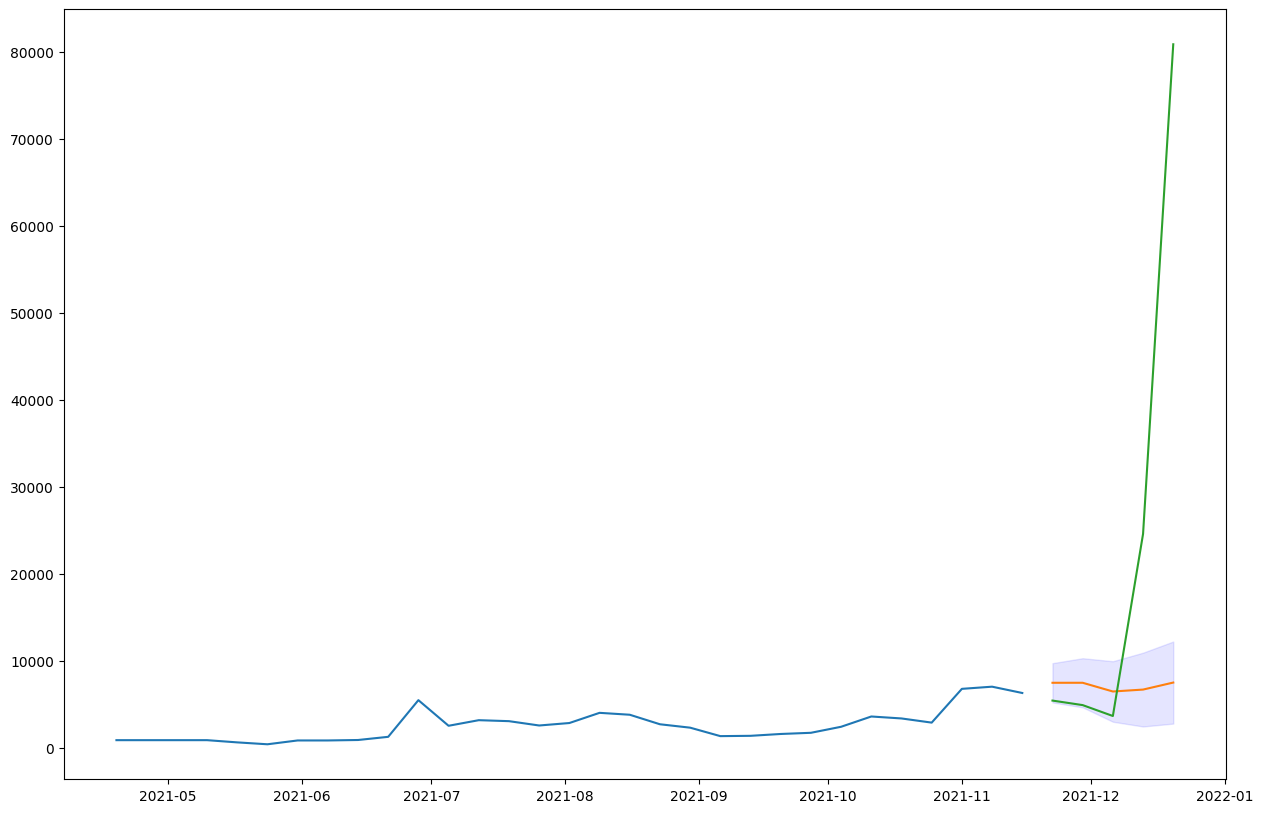

In [38]:
predictions = model.get_forecast(5,alpha = 0.95)
plt.figure(figsize=(15,10))
plt.plot((train))
plt.plot((predictions.predicted_mean))
plt.plot((test))
conf= predictions.conf_int(alpha=0.05)
upper = (conf['lower new_vaccinations_smoothed'])
lower = (conf['upper new_vaccinations_smoothed'])
plt.fill_between(upper.index, upper,lower, color='b', alpha=.1)

In [39]:
size = int(len(hospitalized) * 0.66)
train, test = hospitalized[0:size], hospitalized[size:len(hospitalized)]
prediction = []
data = train.values
for t in test.values:
    model = model = ARIMA(data,order= (2,1,2)).fit()
    y = model.forecast()
    prediction.append(y[0])
    data = np.append(data, t)
test_res = pd.DataFrame(test)
test_res['preds'] = prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

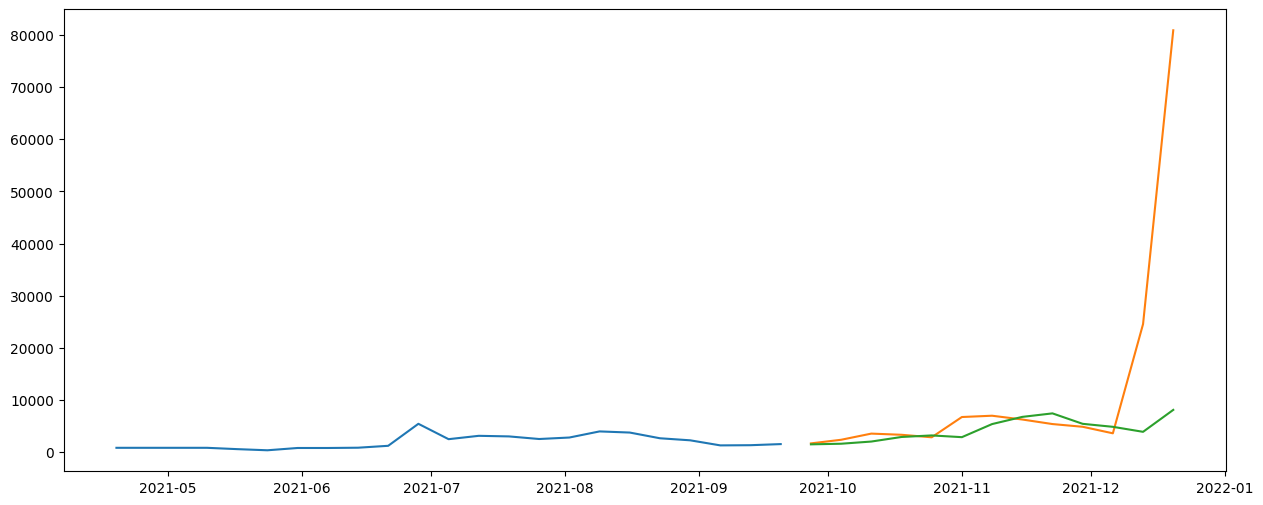

In [40]:
plt.figure(figsize=(15,6))
plt.plot((train))
plt.plot((test_res))

In [41]:
for column_name in df.columns:
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

corr = df.corr()
hospcorr = corr['new_vaccinations_smoothed']
hospcorr = hospcorr[np.abs(hospcorr)>0.4]
hospcorr.sort_values()

total_cases                                   0.423273
total_cases_per_million                       0.423273
total_deaths                                  0.463840
total_deaths_per_million                      0.463841
people_vaccinated                             0.599802
people_vaccinated_per_hundred                 0.599923
total_vaccinations_per_hundred                0.736412
total_vaccinations                            0.736583
new_people_vaccinated_smoothed_per_hundred    0.902153
new_people_vaccinated_smoothed                0.902406
people_fully_vaccinated                       0.990512
people_fully_vaccinated_per_hundred           0.990580
new_vaccinations_smoothed_per_million         1.000000
new_vaccinations_smoothed                     1.000000
Name: new_vaccinations_smoothed, dtype: float64

In [42]:
exogfeats = df[['stringency_index','total_deaths_per_million','total_cases_per_million']]


In [43]:
for column in exogfeats.columns:
  exogfeats[column]= exogfeats[column].fillna(exogfeats[column].mean())

<ipython-input-43-0de7495149cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exogfeats[column]= exogfeats[column].fillna(exogfeats[column].mean())


In [44]:
exogfeats = exogfeats.resample('W-MON').mean()
exogfeats = exogfeats.iloc[(exogfeats.index >= hospitalized.first_valid_index()) & (exogfeats.index<= hospitalized.last_valid_index())]

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

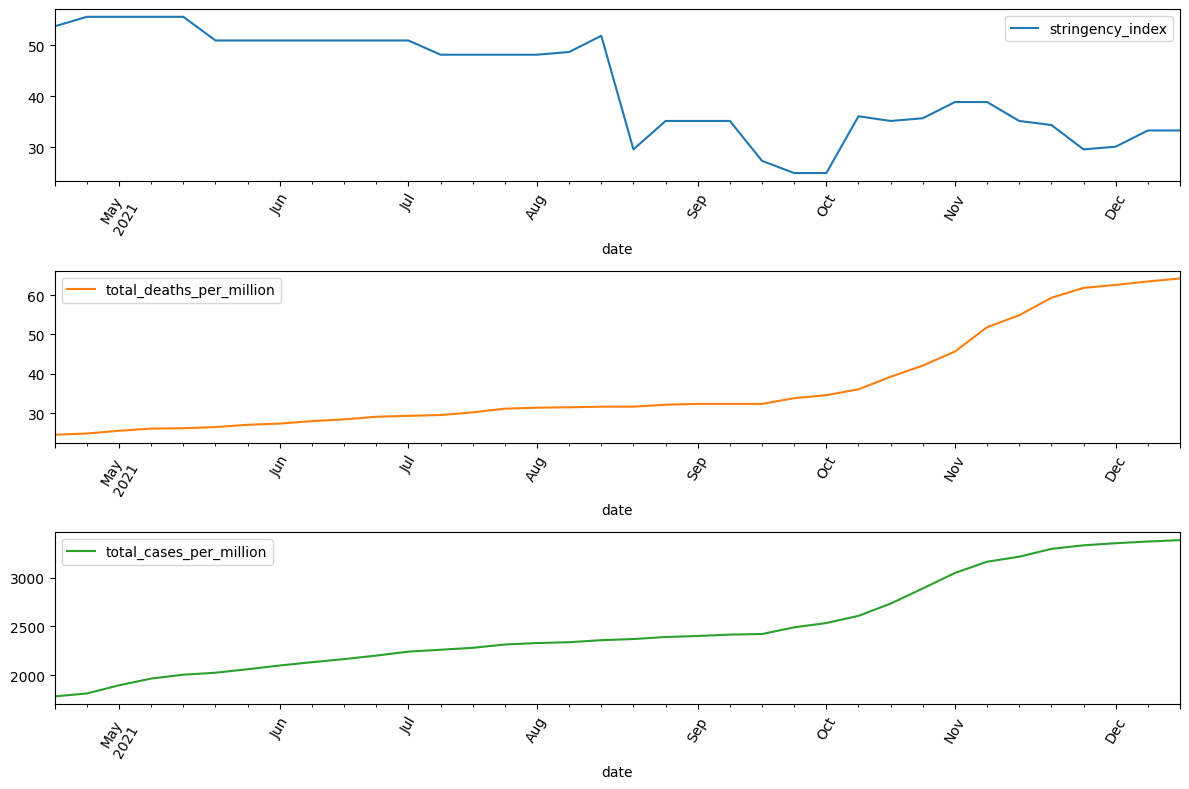

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True)
exogfeats.plot(ax=ax, subplots=True, rot=60)

In [46]:
'''After inserting the exogenous variables, the model is retrained.
Looking at the Ljung Box and Jacque Bera tests,the p-values (all > 0.05) suggest
that the residuals do not show autocorrelation. and that the residuals are reasonably consistent with a normal distribution.

these are all desirable properties for a well-fitted time series model. and so we can go ahead to forecast.

'''

'After inserting the exogenous variables, the model is retrained.\nLooking at the Ljung Box and Jacque Bera tests,the p-values (all > 0.05) suggest \nthat the residuals do not show autocorrelation. and that the residuals are reasonably consistent with a normal distribution.\n\nthese are all desirable properties for a well-fitted time series model. and so we can go ahead to forecast.\n\n'

In [47]:
model = ARIMA(hospitalized,order= (2,1,2),exog=exogfeats).fit()
predictions = model.predict()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                   36
Model:                        ARIMA(2, 1, 2)   Log Likelihood                -352.932
Date:                       Mon, 17 Jun 2024   AIC                            721.864
Time:                               14:15:07   BIC                            734.307
Sample:                           04-19-2021   HQIC                           726.159
                                - 12-20-2021                                         
Covariance Type:                         opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
stringency_index             9.5406    312.517      0.031      0.976    -602.982     622.063
total_deaths_per_million   936.7256    575.463      1.628      0.104    -191.161    2064.612
total_cases_per_million    -12.5886     50.770     -0.248      0.804    -112.096      86.918
ar.L1                        1.8776      0.633      2.968      0.003       0.638       3.118
ar.L2                       -0.8777      0.402     -2.185      0.029      -1.665      -0.091
ma.L1                        0.0426      0.640      0.067      0.947      -1.212       1.298
ma.L2                        0.1505      0.886      0.170      0.865      -1.586       1.887
sigma2                    2.689e+07      0.036   7.55e+08      0.000    2.69e+07    2.69e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                44.27
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.37   Skew:                             1.49
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+24. Standard errors may be unstable.
"""

In [48]:
'''
The plot of the model is compared with the actual data, to visualise its accuracy.
From the results, we can see there is slight variation which is acceptable.

We then go ahead to forecast some steps ahead and visualise.
'''

'\nThe plot of the model is compared with the actual data, to visualise its accuracy.\nFrom the results, we can see there is slight variation which is acceptable.\n\nWe then go ahead to forecast some steps ahead and visualise.\n'

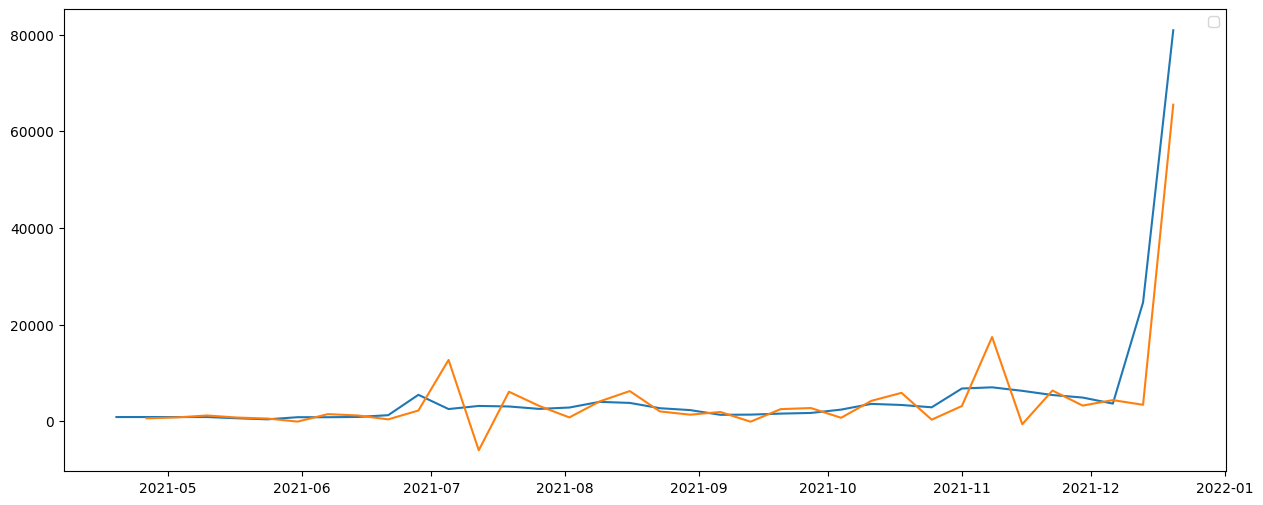

In [49]:
plt.figure(figsize=(15,6))
plt.legend(["a","b"])
plt.plot(hospitalized)
plt.plot(predictions[1:])
plt.show()

In [50]:
test_length = 5
train = hospitalized[:-test_length]
test = hospitalized[-test_length:]
train_exog = exogfeats[:-test_length]
test_exog = exogfeats[-test_length:]
model = ARIMA(train,order= (2,1,2),exog=train_exog).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


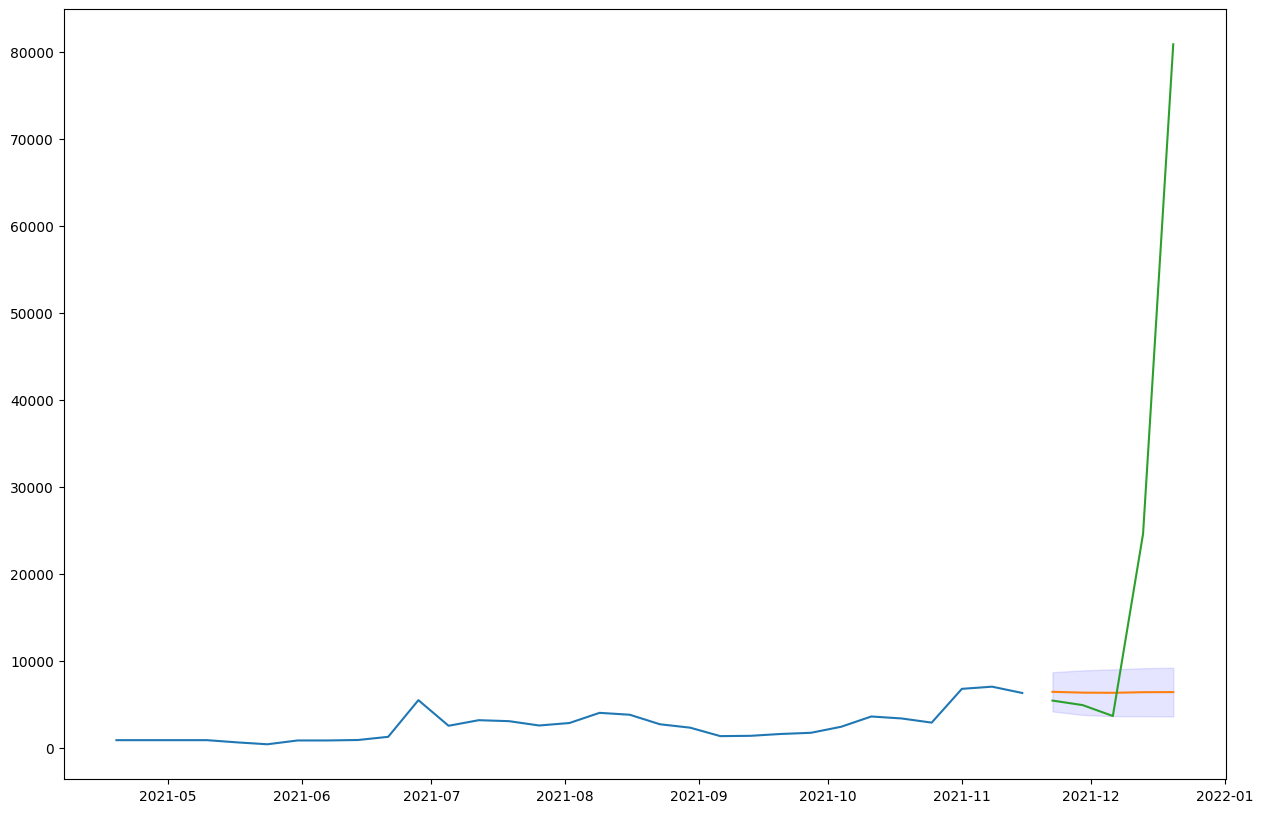

In [51]:
predictions = model.get_forecast(5,exog = test_exog,alpha = 0.95)
plt.figure(figsize=(15,10))
plt.plot((train))
plt.plot((predictions.predicted_mean))
plt.plot((test))
conf= predictions.conf_int(alpha=0.05)
upper = (conf['lower new_vaccinations_smoothed'])
lower = (conf['upper new_vaccinations_smoothed'])
plt.fill_between(upper.index, upper,lower, color='b', alpha=.1)

In [52]:
'''
This output appears to be a summary of a fitted time series model, likely an ARIMA model. Let's break down the information provided:

Coefficients Table:

ar.L1 and ar.L2: Coefficients for the autoregressive (AR) terms at lags 1 and 2, respectively.
ma.L1 and ma.L2: Coefficients for the moving average (MA) terms at lags 1 and 2.
sigma2: Estimate of the variance of the residual errors.
For each coefficient, you have:

coef: The estimated coefficient value.
std err: The standard error of the coefficient estimate.
z: The z-statistic for testing the null hypothesis that the coefficient is zero.
P>|z|: The p-value associated with the z-statistic.
[0.025 0.975]: The 95% confidence interval for the coefficient.
Diagnostic Statistics:

Ljung-Box (L1) (Q): A test statistic for residual autocorrelation at lag 1.
Prob(Q): The p-value for the Ljung-Box test.
Jarque-Bera (JB): A test statistic for normality of the residuals.
Prob(JB): The p-value for the Jarque-Bera test.
Heteroskedasticity (H): A test statistic for heteroskedasticity (non-constant variance) of the residuals.
Skew: The skewness of the residuals.
Interpretation:

Significant Coefficients: Look for coefficients with low p-values (typically below 0.05), indicating they are statistically significant and likely have a real impact on the time series.
Residual Diagnostics: Check the Ljung-Box and Jarque-Bera tests to assess if the residuals meet the assumptions of the model (no autocorrelation and normality).
Heteroskedasticity: If the heteroskedasticity test is significant, it suggests the variance of the errors is not constant, which might require further modeling adjustments.
Remember: Without context on the specific model and data, it's challenging to provide a definitive interpretation. However, this breakdown should help you understand the general meaning of the output.

Rate this answer

Ogochukwu Stanley Ikegbo
Ljung-Box (L1) (Q): 0.66 Jarque-Bera (JB): 1.95 Prob(Q): 0.42 Prob(JB): 0.38

what do these results mean?

Gemini
These results are from diagnostic tests commonly used to assess the adequacy of a fitted time series model, particularly the residuals (errors) of the model. Here's what they indicate:

Ljung-Box Test:

Ljung-Box (L1) (Q): 0.66: This is the test statistic for the Ljung-Box test at lag 1. It measures the presence of autocorrelation (correlation between residuals at different time lags) up to the specified lag.
Prob(Q): 0.42: This is the p-value associated with the Ljung-Box test. A high p-value (generally above 0.05) suggests there is no significant evidence of autocorrelation in the residuals at lag 1.
Jarque-Bera Test:

Jarque-Bera (JB): 1.95: This is the test statistic for the Jarque-Bera test, which assesses whether the residuals follow a normal distribution.
Prob(JB): 0.38: This is the p-value associated with the Jarque-Bera test. A high p-value (typically above 0.05) suggests there is no strong evidence to reject the null hypothesis of normality for the residuals.
Overall Interpretation:

Based on these results:

The residuals do not show significant autocorrelation at lag 1, which is a desirable property for a well-fitted time series model.
The residuals appear to be reasonably consistent with a normal distribution, supporting the assumptions of many time series models.
In summary, these diagnostic tests provide no strong evidence against the adequacy of the fitted model in terms of residual autocorrelation and normality. However, it's essential to consider these results in conjunction with other model diagnostics and the specific context of your analysis.

Rate this answer

'''

"\nThis output appears to be a summary of a fitted time series model, likely an ARIMA model. Let's break down the information provided:\n\nCoefficients Table:\n\nar.L1 and ar.L2: Coefficients for the autoregressive (AR) terms at lags 1 and 2, respectively.\nma.L1 and ma.L2: Coefficients for the moving average (MA) terms at lags 1 and 2.\nsigma2: Estimate of the variance of the residual errors.\nFor each coefficient, you have:\n\ncoef: The estimated coefficient value.\nstd err: The standard error of the coefficient estimate.\nz: The z-statistic for testing the null hypothesis that the coefficient is zero.\nP>|z|: The p-value associated with the z-statistic.\n[0.025 0.975]: The 95% confidence interval for the coefficient.\nDiagnostic Statistics:\n\nLjung-Box (L1) (Q): A test statistic for residual autocorrelation at lag 1.\nProb(Q): The p-value for the Ljung-Box test.\nJarque-Bera (JB): A test statistic for normality of the residuals.\nProb(JB): The p-value for the Jarque-Bera test.\nHet